## Nome: Jean Sette Siqueira Vianna  DRE:116027396
## Modelagem Matem√°tica
## Mini-projeto 1 - C√°lculo da gravidade a partir de experimentos com p√™ndulo

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os import path, listdir
from scipy.optimize import curve_fit

# Ensaios com o sensor de lumin√¢ncia

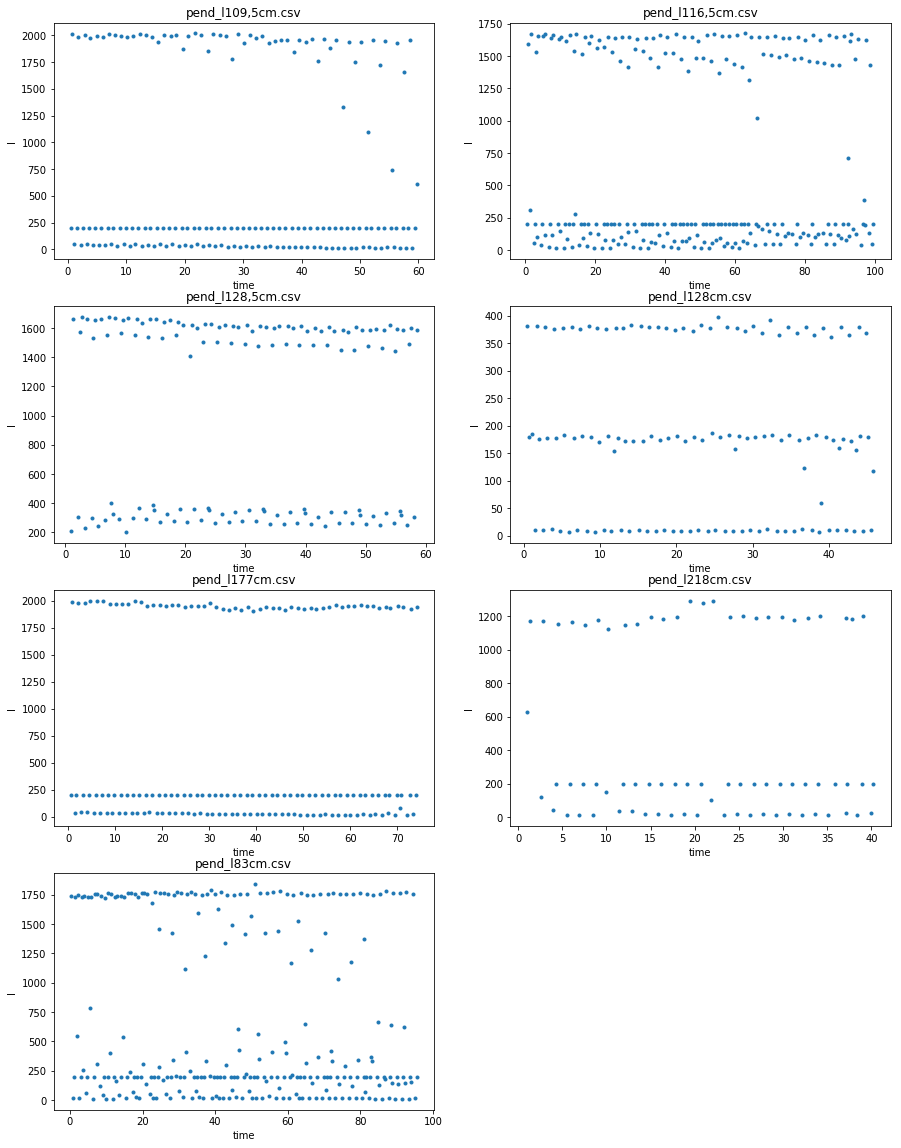

In [8]:
fig = plt.figure(figsize=(15, 20))
place = [421, 422, 423, 424, 425, 426, 427]

arquivos = [f for f in listdir(path.join('pendulo')) if f[:5] == 'pend_']

for arq, n in zip(arquivos, place):
    arquivo = path.join('pendulo', arq)
    df = pd.read_csv(arquivo, header=[0,1])
    
    #Gera gr√°fico
    subplot = fig.add_subplot(n)
    subplot.plot(df[df.columns[0]],df[df.columns[1]],'.')
    subplot.set(title=arq, xlabel=df.columns[0][0], ylabel=df.columns[1][0])

#Exibe figura
plt.show()

Periodo medio para o experimento pend_l109,5cm.csv: 2.10190990990991
Periodo medio para o experimento pend_l116,5cm.csv: 2.1959322033898308
Periodo medio para o experimento pend_l128,5cm.csv: 1.7298030303030303
Periodo medio para o experimento pend_l128cm.csv: 2.190641975308642
Periodo medio para o experimento pend_l177cm.csv: 2.666128440366972
Periodo medio para o experimento pend_l218cm.csv: 3.0123599999999997
Periodo medio para o experimento pend_l83cm.csv: 2.0054787234042553


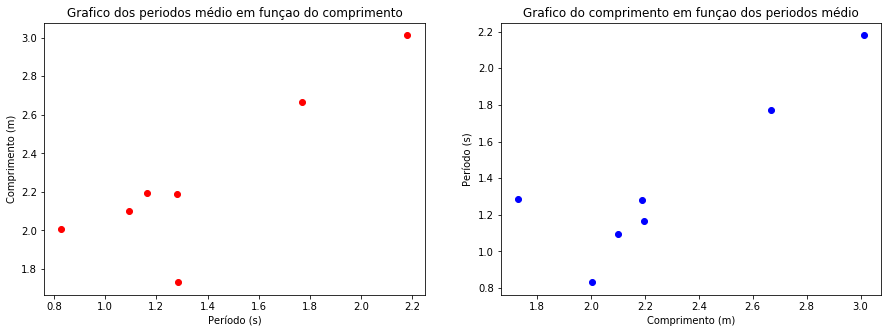

In [11]:
#C√°lculo dos pe√≠odos m√©dios para fazer os gr√°ficos de comprimento x per√≠odo

amostra_periodos_e1 = len(arquivos)*[[]] #Uma lista auxiliar vazia para cada arquivo para posterior an√°lise dos erros
fig = plt.figure(figsize=(15, 5))

subplot1 = fig.add_subplot(121)
subplot2 = fig.add_subplot(122)

comprimentos = [1.095, 1.165, 1.285, 1.28, 1.77, 2.18, 0.83]
periodos= []

for arq, n in zip(arquivos, range(len(arquivos))):    
    arquivo = path.join('pendulo', arq)
    df = pd.read_csv(arquivo, header=[0,1])
    amostra_periodos_e1[n] = []
    
    temposmax = []
    temposmin = []
    for x,y in zip(df[df.columns[0]],df[df.columns[1]]):
        if arq == 'pend_l128,5cm.csv':
            if y >800:
                temposmax.append(x)
            if y <800:
                temposmin.append(x)
    
        else:
            if y >250:
                temposmax.append(x)
            if y <150:
                temposmin.append(x)

    #cria listas para as diferencas dos tempos maximos e minimos
    aux_periodos = []
    j=len(temposmax)
    for i in range(j):
        if i < j-1:
            aux_periodos.append(2*(temposmax[i+1] - temposmax[i])) #Os tempos (temposmax[i+1] - temposmax[i]) sao meio periodo, logo multiplicamos por 2
            amostra_periodos_e1[n].append((temposmax[i+1] - temposmax[i])) #Salvando os meios-periodos dos maximos na lista para o histograma 

    m = len(temposmin)
    for k in range(m):
        if k < m-1:
            aux_periodos.append(2*(temposmin[k+1] - temposmin[k])) #Os tempos (temposmin[k+1] - temposmax[k]) sao meio periodo, logo multiplicamos por 2
            amostra_periodos_e1[n].append((temposmin[k+1] - temposmin[k])) #Salvando os meios-periodos dos minimos na lista para o histograma 

    #Calcula o periodo m√©dio de oscila√ß√£o do pendulo:  
    periodo_medio = np.mean(aux_periodos)
    periodos.append(periodo_medio)

    print("Periodo medio para o experimento "+ arq +":", periodo_medio)
    
subplot1.plot(comprimentos, periodos, 'ro')
subplot1.set(title='Grafico dos periodos m√©dio em fun√ßao do comprimento', xlabel='Per√≠odo (s)', ylabel='Comprimento (m)')

subplot2.plot(periodos, comprimentos, 'bo')
subplot2.set(title='Grafico do comprimento em fun√ßao dos periodos m√©dio', xlabel='Comprimento (m)', ylabel='Per√≠odo (s)')

plt.show()

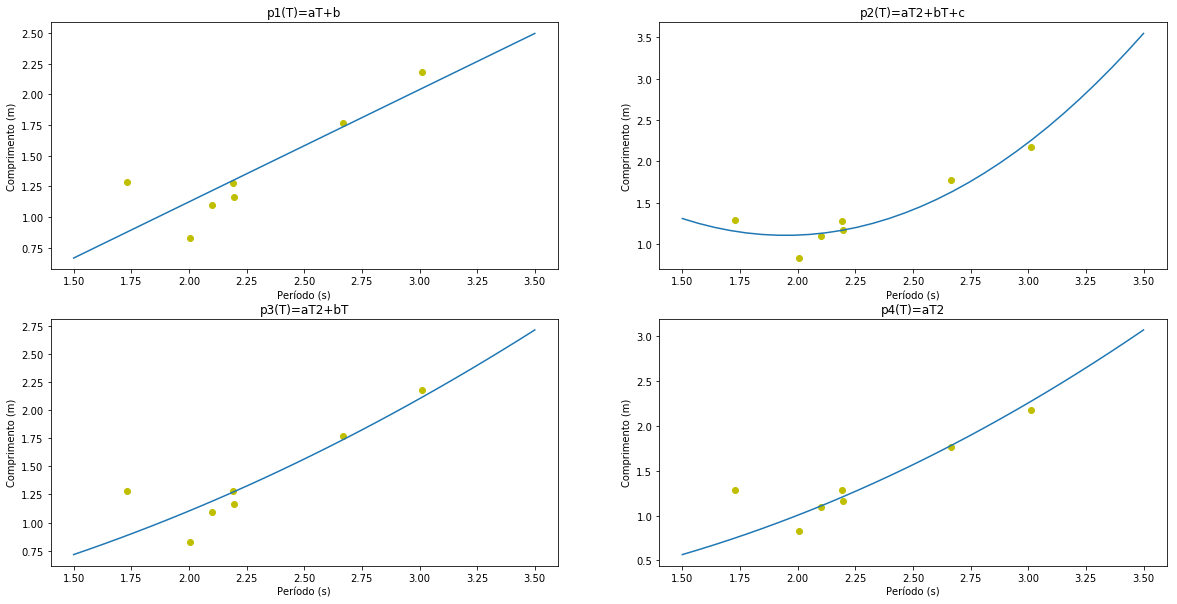

In [12]:
def ajustes(per, comp):
    #Retorna os ajustes lineares e quadr√°ticos
    
    fig = plt.figure(figsize=(20, 10))
    
    subplot1 = fig.add_subplot(221)
    subplot2 = fig.add_subplot(222)
    subplot3 = fig.add_subplot(223)
    subplot4 = fig.add_subplot(224)

    #ùëù1(ùëá)=aùëá+b 
    def f(t, a, b): return a*t + b
    a_opt, b_opt = curve_fit(f,periodos, comprimentos)[0]
    subplot1.plot(periodos, comprimentos, 'yo')
    subplot1.plot(np.linspace(1.5,3.5,30), [f(t,a_opt, b_opt) for t in np.linspace(1.5,3.5,30)])
    subplot1.set(title='p1(T)=aT+b', xlabel='Per√≠odo (s)', ylabel='Comprimento (m)')
    
    #ùëù2(ùëá)=ùëéùëá2+ùëèùëá+ùëê
    def g(t, a, b, c): return a*t**2 + b*t + c    
    a_opt, b_opt, c_opt = curve_fit(g,periodos, comprimentos)[0]
    subplot2.plot(periodos, comprimentos, 'yo')
    subplot2.plot(np.linspace(1.5,3.5,30), [g(t,a_opt, b_opt, c_opt) for t in np.linspace(1.5,3.5,30)])
    subplot2.set(title='p2(T)=aT2+bT+c', xlabel='Per√≠odo (s)', ylabel='Comprimento (m)')
    
    #ùëù3(ùëá)=ùëéùëá2+ùëèùëá 
    def h(t, a, b): return a*t**2 + b*t    
    a_opt, b_opt = curve_fit(h,periodos, comprimentos)[0]
    subplot3.plot(periodos, comprimentos, 'yo')
    subplot3.plot(np.linspace(1.5,3.5,30), [h(t,a_opt, b_opt) for t in np.linspace(1.5,3.5,30)])    
    subplot3.set(title='p3(T)=aT2+bT', xlabel='Per√≠odo (s)', ylabel='Comprimento (m)')
    
    #ùëù4(ùëá)=ùëéùëá2 
    def i(t, a): return a*t**2    
    a_opt = curve_fit(i,periodos, comprimentos)[0]
    subplot4.plot(periodos, comprimentos, 'yo')
    subplot4.plot(np.linspace(1.5,3.5,30), [i(t,a_opt) for t in np.linspace(1.5,3.5,30)])
    subplot4.set(title='p4(T)=aT2', xlabel='Per√≠odo (s)', ylabel='Comprimento (m)')
    
    plt.show()
    
ajustes(periodos, comprimentos)

In [13]:
#C√°lculo da Gravidade pelo modelo linear a partir da regress√£o feita em cima dos periodos medios e comprimentos
def f(t, a): return a*t**2

constante = curve_fit(f,periodos, comprimentos)[0][0]
gravidade_media = constante*4*np.pi**2

print('gravidade m√©dia:', gravidade_media)

gravidade m√©dia: 9.903944210314659


### Coment√°rios

Podemos ver que dentre os ajustes, aparentemente nenhum deles se ajusta adequandamente. Mas, os ajustes quadr√°ticos por possu√≠rem mais termos ajust√°veis entregam uma curva mais fiel aos dados obitidos e, embora saibamos que a lei que rege o experimento segue a regress√£o p4, √© a regressao p2 que melhor se ajusta aos dados, o que mostra que provavelmente alguns pontos deveriam ser descartados antes de fazer a regress√£o por serem outliers.

Utilizando a regress√£o p4, conseguimos calcular a gravidade e achamos o valor 9,904 que √© bem pr√≥ximo do valor tabelado, mesmo com os dados n√£o se ajustando adequandamente √† curva utilizada, no qual obtivemos a constante necessaria para o c√°lculo da gravidade.

### An√°lise da propaga√ß√£o dos erros:

- Para cada comprimento:

	     Dados do arquivo: pend_l109,5cm.csv
M√©dia Amostral = 1.050955, Desvio Padr√£o Amostral = 0.064750,
Desvio Padr√£o Amostral = 0.006146, Erro Relativo = 0.005848
 
Gravidade calculada = 9.784658221944138
Intervalo de confian√ßa para a gravidade = [7.844884563617575, 11.7244318802707]
Erro estimado = 19.824644%

---------------------------------------------------------------

	     Dados do arquivo: pend_l116,5cm.csv
M√©dia Amostral = 1.097966, Desvio Padr√£o Amostral = 0.358843,
Desvio Padr√£o Amostral = 0.026972, Erro Relativo = 0.024566
 
Gravidade calculada = 9.537791112127993
Intervalo de confian√ßa para a gravidade = [4.68627445171821, 14.389307772537775]
Erro estimado = 50.866250%

---------------------------------------------------------------

	     Dados do arquivo: pend_l128,5cm.csv
M√©dia Amostral = 0.864902, Desvio Padr√£o Amostral = 0.329421,
Desvio Padr√£o Amostral = 0.028672, Erro Relativo = 0.033151
 
Gravidade calculada = 16.953897658448113
Intervalo de confian√ßa

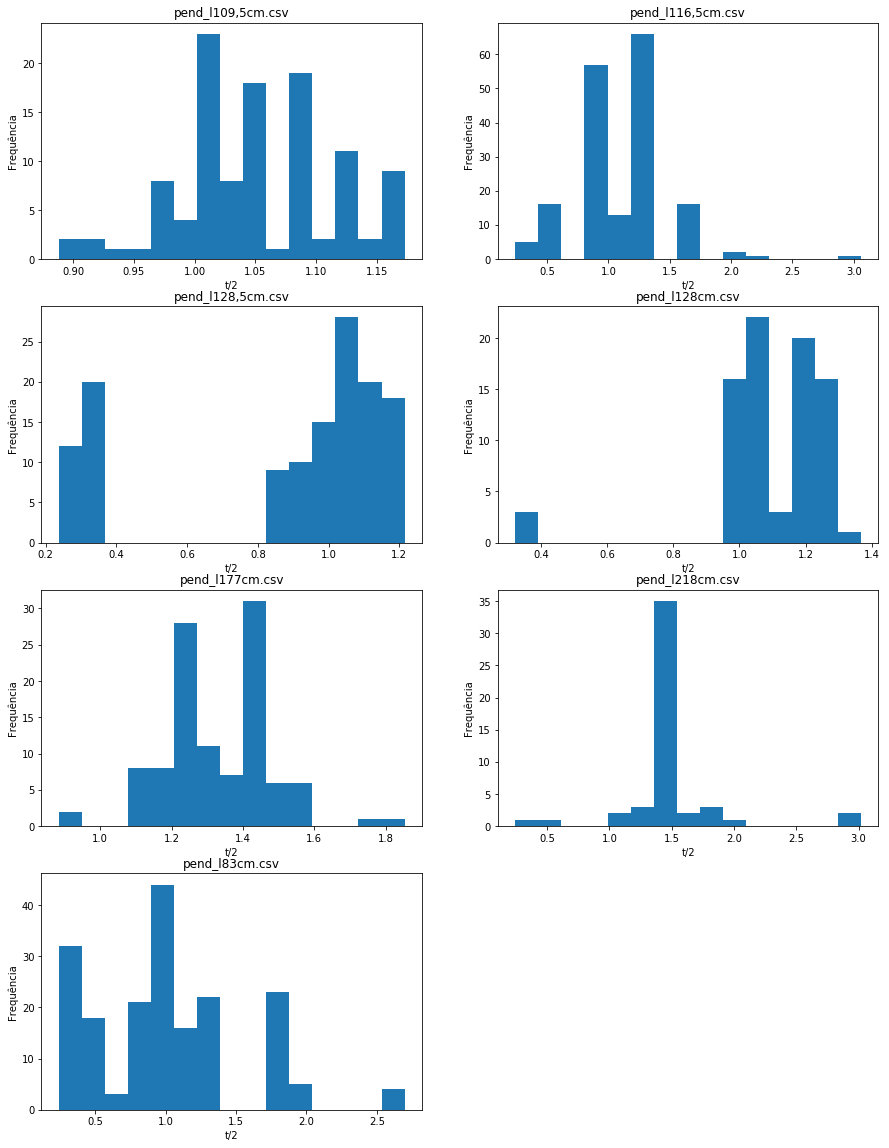

In [15]:
def estimativa(t,l,erroRelativo_t,erroRelativo_l):  #Funcao que calacula a propaga√ß√£o do erro para o calculo da gravidade             
    return (l*erroRelativo_t*2*np.pi**2)/(t**3) + erroRelativo_l*(np.pi/t)**2

fig = plt.figure(figsize=(15, 20))
place = [421, 422, 423, 424, 425, 426, 427]


             
gravidades = [(comprimentos[i]*4*np.pi**2)/((periodos[i])**2) for i in range(len(periodos))] #Calculando a gravidade de acordo com a amostra referente a cada comprmento  
intervalos = [] #Lista para os intervalos de confiana√ßa para as gravidades
    
for arq, n, l, subp in zip(arquivos, range(len(arquivos)), comprimentos, place):
       
    N = len(amostra_periodos_e1[n])                                           #n√∫meros de T/2 medidos (tamanho da amostra)
    mean = sum(amostra_periodos_e1[n])/N                                      #T/2 m√©dio da amostra
    std = (sum([(q - mean)**2 for q in amostra_periodos_e1[n]])/(N-1))**0.5   #Desvio padrao amostral
    st_error = std/(N**0.5)                                                   #Erro padrao amostral
    erroRelativo_t = st_error/mean                                            #Erro relativo da amostra de T/2 
    erroRelativo_l = 0.01                                                     #Erro relativo do comprimento
    estimRelativa = estimativa(t=mean, l=l, erroRelativo_t=erroRelativo_t, erroRelativo_l=erroRelativo_l) #Calculo da propaga√ß√£o de erro para o calculo da gravidade
    
    intervalos.append([gravidades[n]*(1-estimRelativa), gravidades[n]*(1+estimRelativa)]) #Intervalos de confian√ßa
    
    #Gera histograma
    subplot = fig.add_subplot(subp)
    subplot.hist(amostra_periodos_e1[n], bins=15)
    subplot.set(title=arq, xlabel='t/2', ylabel='Frequ√™ncia')
    print('\t     Dados do arquivo: %s' %(arq))
    print('M√©dia Amostral = %f, Desvio Padr√£o Amostral = %f,\nDesvio Padr√£o Amostral = %f, Erro Relativo = %f\n ' %(mean, std, st_error, erroRelativo_t))
    
    print('Gravidade calculada =', gravidades[n])
    print('Intervalo de confian√ßa para a gravidade =', [gravidades[n]*(1-estimRelativa), gravidades[n]*(1+estimRelativa)])
    print('Erro estimado = %f%%\n' %(100*estimRelativa))
    print('---------------------------------------------------------------\n')
    
plt.show()

### Coment√°rios

Apesar de termos achado bons valores para a gravidade, foi encontrado uma propaga√ß√£o de erro muito grande fazendo com que os intervalos de confian√ßa tenham tamb√©m comprimentos grandes. O que pode ter sido causado por um mal tratamento dos dados, ou pelo c√°culo errado dos erros e consequentemente do intervalo, ou de fato √© o que ocorre com a amostra. Diante disso, √© f√°cil ver que  todos os intervalos encontrados incluem o valor tabelado da gravidade.

- Usando todos os comprimentos:

In [16]:
#Achando a constante:
def f(t, a): return a*(2*t)**2      

amostra_periodos_e1_totais = []
for i in amostra_periodos_e1:
    amostra_periodos_e1_totais+=[np.mean(i)] 

constante = curve_fit(f,amostra_periodos_e1_totais, comprimentos)[0][0]

#Calculo da propaga√ß√£o do erro para a(t,l):
def estimativa(t,l,erroRelativo_t,erroRelativo_l):  #Funcao que calacula a propaga√ß√£o do erro para o calculo da gravidade  
    return l*erroRelativo_t/(2*(t**3)) +  erroRelativo_l/((2*t)**2)

#Calculo da gravidade a partir de a(t,l):
gravidade = constante*4*np.pi**2

N = len(amostra_periodos_e1_totais)                                                   #n√∫meros de T/2 medidos (tamanho da amostra)
comprimento_medio = np.mean(comprimentos)                                             #comprimento m√©dio
periodo_medio = np.mean(amostra_periodos_e1_totais)                                   #per√≠odo m√©dio (tamanho da amostra)
std = (sum([(q - periodo_medio)**2 for q in amostra_periodos_e1_totais])/(N-1))**0.5  #Desvio padrao amostral
st_error = std/(N**0.5)                                                               #Erro padrao amostral
erroRelativo_t = st_error/periodo_medio                                               #Erro relativo da amostra de T/2 
erroRelativo_l = 0.01             
estimRelativa = estimativa(periodo_medio, comprimento_medio, erroRelativo_t=erroRelativo_t, erroRelativo_l=erroRelativo_l)
intervalo = [(1-estimRelativa)*gravidade, (1+estimRelativa)*gravidade]

print('\t     Dados do arquivo: %s' %(arq))
print('M√©dia Amostral = %f, Desvio Padr√£o Amostral = %f,\nDesvio Padr√£o Amostral = %f, Erro Relativo = %f\n ' %(periodo_medio, std, st_error, erroRelativo_t))

print('Gravidade calculada =', gravidade)
print('Intervalo de confian√ßa para a gravidade =', intervalo)
print('Erro estimado = %f%%' %(100*estimRelativa))

	     Dados do arquivo: pend_l83cm.csv
M√©dia Amostral = 1.135875, Desvio Padr√£o Amostral = 0.215040,
Desvio Padr√£o Amostral = 0.081278, Erro Relativo = 0.071555
 
Gravidade calculada = 9.903944210314659
Intervalo de confian√ßa para a gravidade = [9.55299223379683, 10.254896186832488]
Erro estimado = 3.543558%


### Coment√°rios

Podemos ver que a gravidade chegou bem pr√≥ximo do valor tabelado, al√©m disso o erro foi bem baixo. Mas volto a dizer que √© poss√≠vel que o c√°lculo n√£o tenha sido feito da forma correta, entretanto considerando este erro, o intervalo de confian√ßa tamb√©m inclui a gravidade tabelada com uma margem de erro bem menor do que qualquer intervalo feito por comprimento separadamente na analise anterior. O que nos faz crer que o m√©todo em que calculamos a gravidade a partir de todos os periodos m√©dios e comprimentos √© mais preciso do que quando calculamos para cada periodo m√©dio e comprimento separadamente.

## Ensaios com o sensor de proximidade

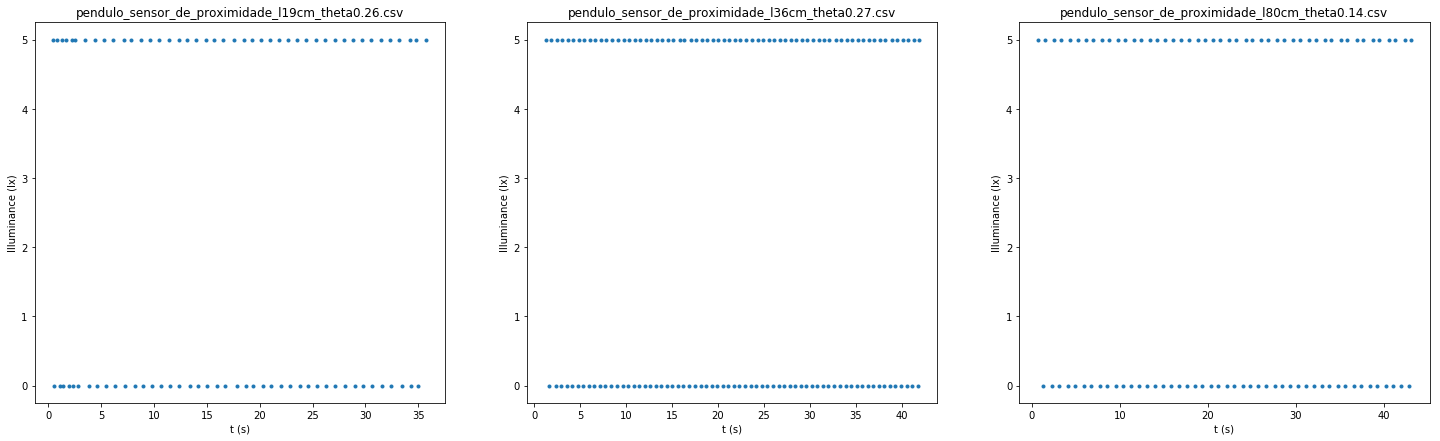

In [19]:
fig = plt.figure(figsize=(25, 7))
place = [131, 132, 133]

arquivos = [f for f in listdir(path.join('pendulo')) if 'pendulo_sensor_de_proximidade' in f]
arquivos = arquivos[1:]

for arq, n in zip(arquivos, place):
    arquivo = path.join('pendulo', arq)
    df = pd.read_csv(arquivo, header=[0,1])
    
    #Gera gr√°fico
    subplot = fig.add_subplot(n)
    subplot.plot(df[df.columns[0]],df[df.columns[1]],'.')
    subplot.set(title=arq, xlabel=df.columns[0][0], ylabel=df.columns[1][0])
    
plt.show()

Periodo medio para o experimento pendulo_sensor_de_proximidade_l19cm_theta0.26.csv: 1.6408701643388233
Periodo medio para o experimento pendulo_sensor_de_proximidade_l36cm_theta0.27.csv: 1.2133503174135336
Periodo medio para o experimento pendulo_sensor_de_proximidade_l80cm_theta0.14.csv: 1.8058875913784944


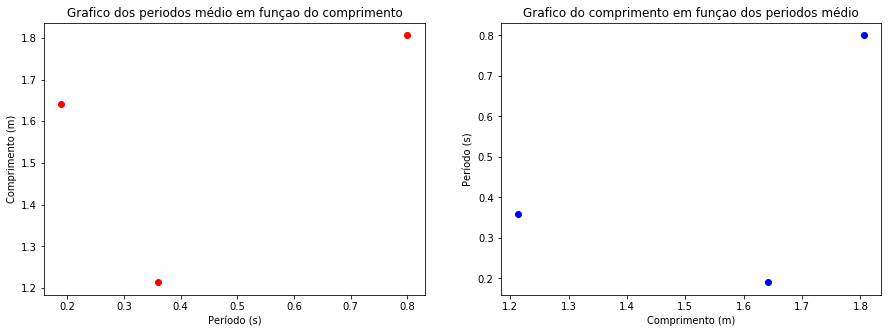

In [21]:
#C√°lculo dos pe√≠odos m√©dios para fazer os gr√°ficos de comprimento x per√≠odo

amostra_periodos_e2 = len(arquivos)*[[]] #Uma lista auxiliar vazia para cada arquivo para posterior an√°lise dos erros
fig = plt.figure(figsize=(15, 5))

subplot1 = fig.add_subplot(121)
subplot2 = fig.add_subplot(122)

comprimentos = [0.19, 0.36, 0.80]
periodos = []
for arq, n in zip(arquivos, range(len(comprimentos))):
    amostra_periodos_e2[n] = []
    arquivo = path.join('pendulo', arq)
    df = pd.read_csv(arquivo, header=[0,1])
    
    #Listas para guardar os tempos em que a iluminancia √© maxima e minima
    temposmax = []
    temposmin = []

    for t,y in zip(df[df.columns[0]], df[df.columns[1]]):
        if y==5:
            temposmax.append(t)
        if y==0:
            temposmin.append(t)

    #Lista para guardar o dobro das distancias dos tempos em que a iluminancia √© maxima e minima, que √© o periodo
    aux_periodos =[]

    #Loops para calcular a distancia dos tempos de maximo e minimo      
    for i in range(len(temposmax)):
        if i < len(temposmax)-1:
            aux_periodos.append(2*(temposmax[i+1] - temposmax[i])) #Os tempos (temposmin[i+1] - temposmin[i]) sao meio periodo, logo multiplicamos por 2
            amostra_periodos_e2[n].append((temposmax[i+1] - temposmax[i])) #Salvando os meios-periodos dos maximos na lista para o histograma 

    m = len(temposmin)
    for k in range(m):
        if k < m-1:
            aux_periodos.append(2*(temposmin[k+1] - temposmin[k])) #Os tempos (temposmax[i+1] - temposmax[i]) sao meio periodo, logo multiplicamos por 2
            amostra_periodos_e2[n].append((temposmin[k+1] - temposmin[k])) #Salvando os meios-periodos dos minimos na lista para o histograma 


    #Calculando o periodo medio geral
    periodo_medio = np.mean(aux_periodos)
    periodos.append(periodo_medio)
    print("Periodo medio para o experimento "+ arq +":", periodo_medio)
    
subplot1.plot(comprimentos, periodos, 'ro')
subplot1.set(title='Grafico dos periodos m√©dio em fun√ßao do comprimento', xlabel='Per√≠odo (s)', ylabel='Comprimento (m)')

subplot2.plot(periodos, comprimentos, 'bo')
subplot2.set(title='Grafico do comprimento em fun√ßao dos periodos m√©dio', xlabel='Comprimento (m)', ylabel='Per√≠odo (s)')

plt.show()

C:\Users\JEAN\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


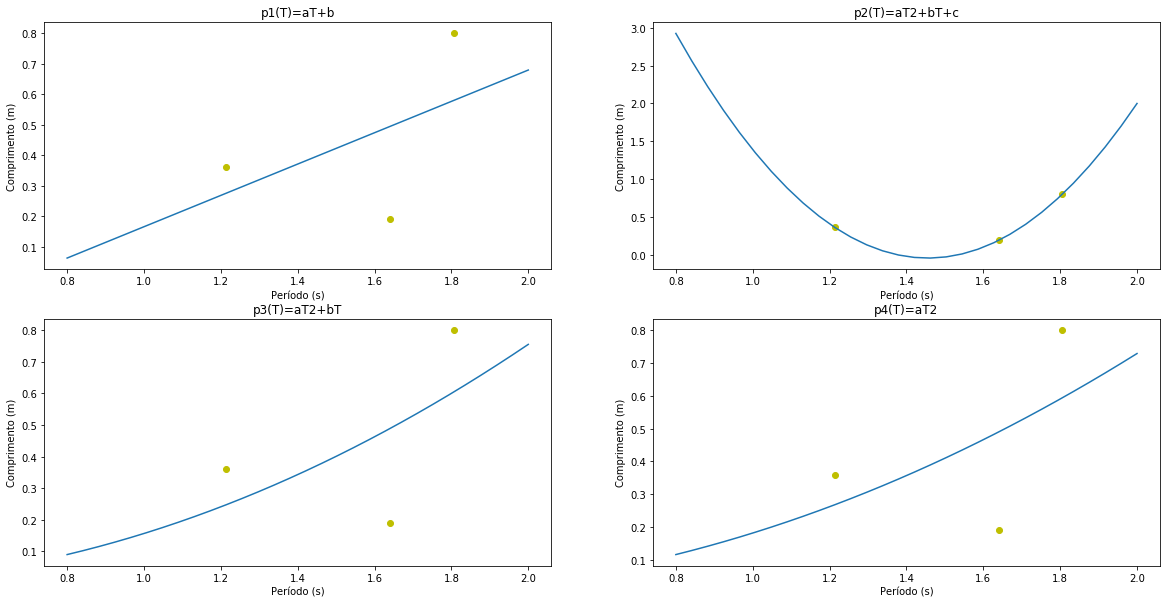

In [22]:
#Testando diferentes ajustes

def ajustes(per, comp):
    #Retorna os ajustes lineares e quadr√°ticos
    
    fig = plt.figure(figsize=(20, 10))
    
    subplot1 = fig.add_subplot(221)
    subplot2 = fig.add_subplot(222)
    subplot3 = fig.add_subplot(223)
    subplot4 = fig.add_subplot(224)

    #ùëù1(ùëá)=aùëá+b 
    def f(t, a, b): return a*t + b
    a_opt, b_opt = curve_fit(f,periodos, comprimentos)[0]
    subplot1.plot(periodos, comprimentos, 'yo')
    subplot1.plot(np.linspace(0.8,2.0,30), [f(t,a_opt, b_opt) for t in np.linspace(0.8,2.0,30)])
    subplot1.set(title='p1(T)=aT+b', xlabel='Per√≠odo (s)', ylabel='Comprimento (m)')
    
    #ùëù2(ùëá)=ùëéùëá2+ùëèùëá+ùëê
    def g(t, a, b, c): return a*t**2 + b*t + c
    a_opt, b_opt, c_opt = curve_fit(g,periodos, comprimentos)[0]
    subplot2.plot(periodos, comprimentos, 'yo')
    subplot2.plot(np.linspace(0.8,2.0,30), [g(t,a_opt, b_opt, c_opt) for t in np.linspace(0.8,2.0,30)])
    subplot2.set(title='p2(T)=aT2+bT+c', xlabel='Per√≠odo (s)', ylabel='Comprimento (m)')
    
    #ùëù3(ùëá)=ùëéùëá2+ùëèùëá 
    def h(t, a, b): return a*t**2 + b*t
    a_opt, b_opt = curve_fit(h,periodos, comprimentos)[0]
    subplot3.plot(periodos, comprimentos, 'yo')
    subplot3.plot(np.linspace(0.8,2.0,30), [h(t,a_opt, b_opt) for t in np.linspace(0.8,2.0,30)])    
    subplot3.set(title='p3(T)=aT2+bT', xlabel='Per√≠odo (s)', ylabel='Comprimento (m)')
    
    #ùëù4(ùëá)=ùëéùëá2 
    def i(t, a): return a*t**2
    a_opt = curve_fit(i,periodos, comprimentos)[0]
    subplot4.plot(periodos, comprimentos, 'yo')
    subplot4.plot(np.linspace(0.8,2.0,30), [i(t,a_opt) for t in np.linspace(0.8,2.0,30)])
    subplot4.set(title='p4(T)=aT2', xlabel='Per√≠odo (s)', ylabel='Comprimento (m)')
    
    plt.show()
    
ajustes(periodos, comprimentos)

In [23]:
#C√°lculo da Gravidade pelo modelo linear

def f(t, a): return a*t**2

constante = curve_fit(f,periodos, comprimentos)[0][0]
gravidade_media = constante*4*np.pi**2

print('gravidade m√©dia:', gravidade_media)

gravidade m√©dia: 7.187078506443027


### Coment√°rios

√â claro que o melhor ajuste foi o p2, pois temos tr√™s pontos nos quais s√£o suficientes para se tra√ßar uma par√°bola que passe por todos, logo se ajustou perfeitamente. Mas sabemos que a lei que rege o experimento √© o da regress√£o p4, e por isso vamos us√°-la, mesmo n√£o se ajustando muito bem, para o c√°lculo da gravidade. O que indica um maior erro experimental neste ensaio, que se comprovou com um valor de gravidade bem baixo no valor de 7,1871. O que pode ser explicado pelo fato de que o experimento realizado com a haste de 19cm teve medidas que n√£o foram registradas, e por isso obitvemos um valor distante do valor real para o per√≠odo . 

### An√°lise da propaga√ß√£o dos erros:

- Para cada comprimento:

	     Dados do arquivo: pendulo_sensor_de_proximidade_l19cm_theta0.26.csv
M√©dia Amostral = 0.820435, Desvio Padr√£o Amostral = 0.168478,
Desvio Padr√£o Amostral = 0.018274, Erro Relativo = 0.022274
 
Gravidade calculada = 2.7858960071591445
Intervalo de confian√ßa para a gravidade = [1.9560000007253338, 3.615792013592955]
Erro estimado = 29.789195%

--------------------------------------------------------------------------------

	     Dados do arquivo: pendulo_sensor_de_proximidade_l36cm_theta0.27.csv
M√©dia Amostral = 0.606675, Desvio Padr√£o Amostral = 0.055810,
Desvio Padr√£o Amostral = 0.004839, Erro Relativo = 0.007977
 
Gravidade calculada = 9.653611594055098
Intervalo de confian√ßa para a gravidade = [4.614297900360515, 14.69292528774968]
Erro estimado = 52.201331%

--------------------------------------------------------------------------------

	     Dados do arquivo: pendulo_sensor_de_proximidade_l80cm_theta0.14.csv
M√©dia Amostral = 0.902944, Desvio Padr√£o Amostral = 0.09

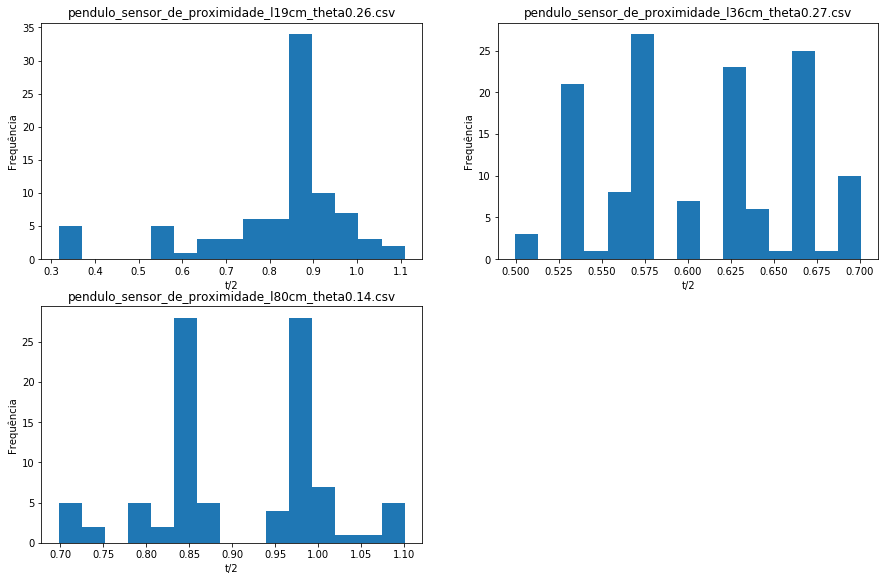

In [24]:
def estimativa(t,l,erroRelativo_t,erroRelativo_l):  #Funcao que calacula a propaga√ß√£o do erro para o calculo da gravidade             
    return (l*erroRelativo_t*2*np.pi**2)/(t**3) + erroRelativo_l*(np.pi/t)**2

fig = plt.figure(figsize=(15, 20))
place = [421, 422, 423, 424, 425, 426, 427]


             
gravidades = [(comprimentos[i]*4*np.pi**2)/((periodos[i])**2) for i in range(len(periodos))] #Calculando a gravidade de acordo com a amostra referente a cada comprmento  
intervalos = [] #Lista para os intervalos de confiana√ßa para as gravidades
    
for arq, n, l, subp in zip(arquivos, range(len(arquivos)), comprimentos, place):
       
    N = len(amostra_periodos_e2[n])                                           #n√∫meros de T/2 medidos (tamanho da amostra)
    mean = sum(amostra_periodos_e2[n])/N                                      #T/2 m√©dio da amostra
    std = (sum([(q - mean)**2 for q in amostra_periodos_e2[n]])/(N-1))**0.5   #Desvio padrao amostral
    st_error = std/(N**0.5)                                                   #Erro padrao amostral
    erroRelativo_t = st_error/mean                                            #Erro relativo da amostra de T/2 
    erroRelativo_l = 0.01                                                     #Erro relativo do comprimento
    estimRelativa = estimativa(t=mean, l=l, erroRelativo_t=erroRelativo_t, erroRelativo_l=erroRelativo_l) #Calculo da propaga√ß√£o de erro para o calculo da gravidade
    
    intervalos.append([gravidades[n]*(1-estimRelativa), gravidades[n]*(1+estimRelativa)]) #Intervalos de confian√ßa
    
    #Gera histograma
    subplot = fig.add_subplot(subp)
    subplot.hist(amostra_periodos_e2[n], bins=15)
    subplot.set(title=arq, xlabel='t/2', ylabel='Frequ√™ncia')
    print('\t     Dados do arquivo: %s' %(arq))
    print('M√©dia Amostral = %f, Desvio Padr√£o Amostral = %f,\nDesvio Padr√£o Amostral = %f, Erro Relativo = %f\n ' %(mean, std, st_error, erroRelativo_t))
    
    print('Gravidade calculada =', gravidades[n])
    print('Intervalo de confian√ßa para a gravidade =', [gravidades[n]*(1-estimRelativa), gravidades[n]*(1+estimRelativa)])
    print('Erro estimado = %f%%\n' %(100*estimRelativa))
    print('--------------------------------------------------------------------------------\n')
    
plt.show()

### Coment√°rios

Bons valores para gravidade foram encontrados nos experimentos com hastes de 36cm e 80cm, o que n√£o ocorreu no experimento com haste de 19cm. Os erros continuaram grandes, entretanto o √∫nico intervalo de confian√ßa no qual n√£o abrange o valor tabelado da gravidade √© o com haste de 19cm. O que era de se esperar pois foi encontrado um valor para gravidade de 2.78 nesse experimento, o que refor√ßa a id√©ia de que era para ele ter sido descartado por inteiro, ou ent√£o ter seus dados melhor tratados uma vez que o sensor apresentou problemas na medi√ß√£o.

- Para cada comprimento:

In [25]:
#Achando a constante:
def f(t, a): return a*(2*t)**2      

amostra_periodos_e2_totais = []
for i in amostra_periodos_e2:
    amostra_periodos_e2_totais+=[np.mean(i)] 

constante = curve_fit(f,amostra_periodos_e2_totais, comprimentos)[0][0]

#Calculo da propaga√ß√£o do erro para a(t,l):
def estimativa(t,l,erroRelativo_t,erroRelativo_l):  #Funcao que calacula a propaga√ß√£o do erro para o calculo da gravidade  
    return l*erroRelativo_t/(2*(t**3)) +  erroRelativo_l/((2*t)**2)

#Calculo da gravidade a partir de a(t,l):
gravidade = constante*4*np.pi**2

N = len(amostra_periodos_e2_totais)                                                   #n√∫meros de T/2 medidos (tamanho da amostra)
comprimento_medio = np.mean(comprimentos)                                             #comprimento m√©dio
periodo_medio = np.mean(amostra_periodos_e2_totais)                                   #per√≠odo m√©dio (tamanho da amostra)
std = (sum([(q - periodo_medio)**2 for q in amostra_periodos_e2_totais])/(N-1))**0.5  #Desvio padrao amostral
st_error = std/(N**0.5)                                                               #Erro padrao amostral
erroRelativo_t = st_error/periodo_medio                                               #Erro relativo da amostra de T/2 
erroRelativo_l = 0.01             
estimRelativa = estimativa(periodo_medio, comprimento_medio, erroRelativo_t=erroRelativo_t, erroRelativo_l=erroRelativo_l)
intervalo = [(1-estimRelativa)*gravidade, (1+estimRelativa)*gravidade]

print('\t     Dados do arquivo: %s' %(arq))
print('M√©dia Amostral = %f, Desvio Padr√£o Amostral = %f,\nDesvio Padr√£o Amostral = %f, Erro Relativo = %f\n ' %(periodo_medio, std, st_error, erroRelativo_t))

print('Gravidade calculada =', gravidade)
print('Intervalo de confian√ßa para a gravidade =', intervalo)
print('Erro estimado = %f%%' %(100*estimRelativa))

	     Dados do arquivo: pendulo_sensor_de_proximidade_l80cm_theta0.14.csv
M√©dia Amostral = 0.776685, Desvio Padr√£o Amostral = 0.152903,
Desvio Padr√£o Amostral = 0.088279, Erro Relativo = 0.113661
 
Gravidade calculada = 7.187078506443027
Intervalo de confian√ßa para a gravidade = [6.76499925555568, 7.609157757330374]
Erro estimado = 5.872751%


### Coment√°rios

O valor baixo para gravidade √© devido ao experimento com a haste de 19cm. Entretanto o erro estimado ficou baixo, o que provavelmente se deve ao fato de tratar todos os experimentos como uma amostra √∫nica, mas sem descartar a id√©ia de que o c√°lculo do erro n√£o foi realizado de maneira correta. Ainda sim, devido ao experimento problem√°tico, conseguimos um valor baixo para a gravidade com erro pequeno, criando um intervalo de confian√ßa no qual n√£o abrange o valor tabelado para a gravidade ao mesmo tempo que mostra que o m√©todo produz um erro menor, assim sendo mais preciso.